In [2]:
import pandas as pd
import glob
import numpy as np
import json
import math
from natsort import natsorted

In [3]:
data = pd.read_json("/home/ravi/raviProject/DATA/Annotate/remaining_V2.json", orient='records')

In [4]:
data.shape

(2281110, 5)

In [5]:
data.head(5)

,msgDate,msg,replyDate,reply,telegramChannel
0,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611532985,"Keep on keepin’ on. May the Trinity, the Fathe...",AlexJones.json
1,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611538372,They are really messing with the signal right ...,AlexJones.json
2,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611540892,,AlexJones.json
3,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611541436,Wow comments are on.,AlexJones.json
4,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611542543,The other day when I called in and spoke with ...,AlexJones.json


In [6]:
df = data.copy()

In [7]:
sampled_df = df.sample(n=10000, replace=False, random_state=42)

In [8]:
sampled_df.shape

(10000, 5)

In [9]:
sampled_df.head(5)

,msgDate,msg,replyDate,reply,telegramChannel
698078,1614470806,#AlexJonesShow LIVE: Special Saturday Broadca...,1614475550,,InfoWars.json
118184,1621982338,This could send Trump to prison.\n,1621982775,"Its a bunch of Bullshit, the DemonRats will ...",AnalyzingAmerica.json
621127,1686775907,Help @prageru fight the insanity. Answer thi...,1686804007,I don’t think they should but we are suppose t...,DonaldTrumpJr.json
1654911,1687465098,b u t n e v e r s e e i n g t h e s u ...,1687465158,night shift means your “evening” is mid-day,RiotDogs.json
1724688,1645392413,B R E A K I N G ! 🚨 T h e s i s t e r ...,1645398444,Calls to mind Barry and Honey Sherman… I’m pre...,ThePatriotVoice.json


In [10]:
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/sampled_V3_10K.json', orient='records')

In [11]:
# sampled_df=pd.read_json('/home/ravi/raviProject/DATA/Annotate/sampled_V1.json', orient='records')
# # Save DataFrame as JSONL (JSON Lines)
# with open('/home/ravi/raviProject/DATA/Annotate/sampled_V1.jsonl', 'w') as f:
#     sampled_df.to_json(f, orient='records', lines=True)

In [11]:
remaining_df = df.drop(sampled_df.index)

In [12]:
remaining_df.shape

(2271110, 5)

In [13]:
remaining_df.to_json('/home/ravi/raviProject/DATA/Annotate/remaining_V3.json', orient='records')

In [14]:
remaining_df.head(5)

,msgDate,msg,replyDate,reply,telegramChannel
0,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611532985,"Keep on keepin’ on. May the Trinity, the Fathe...",AlexJones.json
1,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611538372,They are really messing with the signal right ...,AlexJones.json
2,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611540892,,AlexJones.json
3,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611541436,Wow comments are on.,AlexJones.json
4,1611529552,Leftist Eviro. Plan For Total Planetary Serfdo...,1611542543,The other day when I called in and spoke with ...,AlexJones.json


# sample ~100 per class wrt model predictions

In [15]:
df = pd.read_json('/home/ravi/raviProject/DATA/Annotate/sampled_V3_10K_yPred_RoBERTa.json', orient='records')

In [16]:
df['y_pred'].value_counts()

0    8888
2     814
1     298
Name: y_pred, dtype: int64

In [17]:
df.head()

,msgDate,msg,replyDate,text,telegramChannel,y_pred
0,1614470806,#AlexJonesShow LIVE: Special Saturday Broadca...,1614475550,,InfoWars.json,0
1,1621982338,This could send Trump to prison.\n,1621982775,"Its a bunch of Bullshit, the DemonRats will ...",AnalyzingAmerica.json,1
2,1686775907,Help @prageru fight the insanity. Answer thi...,1686804007,I don’t think they should but we are suppose t...,DonaldTrumpJr.json,0
3,1687465098,b u t n e v e r s e e i n g t h e s u ...,1687465158,night shift means your “evening” is mid-day,RiotDogs.json,0
4,1645392413,B R E A K I N G ! 🚨 T h e s i s t e r ...,1645398444,Calls to mind Barry and Honey Sherman… I’m pre...,ThePatriotVoice.json,0


In [20]:
# Sample 100 rows with class 1
sample_class_1 = df[df['y_pred'] == 0].sample(n=300, random_state=42)

# Sample 200 rows with class 2
sample_class_2 = df[df['y_pred'] == 1].sample(n=298, random_state=42)

# Sample 400 rows with class 3
sample_class_3 = df[df['y_pred'] == 2].sample(n=814, random_state=42)

# Concatenate the sampled dataframes
sampled_df = pd.concat([sample_class_1, sample_class_2, sample_class_3])

# Shuffle the dataframe
sampled_df = sampled_df.sample(frac=1, random_state=42)

# Drop the sampled rows from the original DataFrame to get the remaining rows
remaining_data = df.drop(sampled_df.index)

In [22]:
# Print the first few rows to verify
sampled_df.head()

,msgDate,msg,replyDate,text,telegramChannel,y_pred
2224,1663953628,,1663954508,"More than likely, I would put that sick fuck ...",ResisttheMainstream.json,2
4181,1663675293,🔴 Ron DeSantis Responds to Gavin Newsom’s Deb...,1663712946,Desantis will chew him up and spit him out int...,ResisttheMainstream.json,2
2982,1626275658,"Saturday, JULY 24 at 1PM\n\nNEW YORK CITY\n\nW...",1626316312,"Have banners that says ?"" Arrest Fauci"" Arrest...",COVIDVACCINEVICTIMS.json,1
6361,1631991779,Tucker Carlson Eviscerates Joe Biden for Droni...,1632001527,Patriots are out fighting across the country. ...,TheTrumpRepublicans.json,0
4369,1629302323,C o n c e r n i n g 1 0 7 . . . \n \n I ’ v ...,1629318839,,PatriotStreetfighter.json,0


In [23]:
len(sampled_df), len(remaining_data)

(1412, 8588)

In [24]:
remaining_data.to_json('/home/ravi/raviProject/DATA/Annotate/sampled_V3_10K_yPred_RoBERTa_remaining8588.json', orient='records')
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/sampled_V3_10K_yPred_RoBERTa_Sampled1412WithYpred.json', orient='records')
sampled_df = sampled_df.drop(columns=['y_pred'])
sampled_df.to_csv('/home/ravi/raviProject/DATA/Annotate/sampled_V3_10K_yPred_RoBERTa_Sampled1412WithoutYpred.csv')

# Compare Labels

In [52]:
V3GPT=pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV3/sampled_V3_10K_yPred_RoBERTa_Sampled1412WithYpred.json', orient='records')

In [67]:
V3GPT.shape

(1412, 6)

In [60]:
V3GPT.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred
0,1663953628,,1663954508,"More than likely, I would put that sick fuck ...",ResisttheMainstream.json,3


In [61]:
V3GPT.tail(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred
1411,1698292459,S e n . K e n n e d y e x p o s e s t h ...,1698297951,This is treason. Treason is a hanging crime.,TrumpSupportersChannel.json,3


In [53]:
V3GPT['y_pred'].value_counts()

2    814
0    300
1    298
Name: y_pred, dtype: int64

In [54]:
# Replace values in column 'FinalLabel'
replacement_dict = {0 : 1, 1 : 2, 2 : 3}
V3GPT['y_pred'] = V3GPT['y_pred'].replace(replacement_dict)

In [55]:
V3Ravi=pd.read_csv('/home/ravi/raviProject/DATA/Annotate/LabelV3/sampled_V3_10K_yPred_RoBERTa_Sampled1412WithoutYpred_RaviLabel.csv')

In [68]:
V3Ravi.shape

(1412, 7)

In [62]:
V3Ravi.head(1)

,Unnamed: 0,msgDate,msg,replyDate,text,telegramChannel,LabelRavi
0,2224,1663953628,NaN,1663954508,"More than likely, I would put that sick fuck ...",ResisttheMainstream.json,3.0


In [63]:
V3Ravi.tail(1)

,Unnamed: 0,msgDate,msg,replyDate,text,telegramChannel,LabelRavi
1411,5140,1698292459,S e n . K e n n e d y e x p o s e s t h ...,1698297951,This is treason. Treason is a hanging crime.,TrumpSupportersChannel.json,3.0


In [64]:
V3Ravi['LabelRavi'].value_counts()

1.0    1094
3.0     176
2.0     134
Name: LabelRavi, dtype: int64

In [71]:
V3Labels=V3GPT.copy()
V3Labels['RLabel']=V3Ravi['LabelRavi']
V3Labels = V3Labels.dropna(subset=['RLabel'], axis=0)
V3Labels['RLabel']=V3Labels['RLabel'].astype('int64')

In [104]:
V3Labels.shape

(1404, 7)

In [105]:
V3Labels['RLabel'].value_counts()

1    1094
3     176
2     134
Name: RLabel, dtype: int64

In [106]:
V3Labels.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred,RLabel
0,1663953628,,1663954508,"More than likely, I would put that sick fuck ...",ResisttheMainstream.json,3,3


In [121]:
V3Labels.to_csv('/home/ravi/raviProject/DATA/Annotate/LabelV3/sampled_V3_10K_yPred_RoBERTa_Sampled1404WithYpred_RaviLabel.csv')

## score

In [74]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report, f1_score, accuracy_score


In [161]:
def sample_per_class(df, sample_count):
    sampled_df = pd.DataFrame()
    remaining_df = df.copy()

    # Iterate over unique classes
    for class_label in df['RLabel'].unique():
        # Extract 100 rows where the column value is the current class label
        sampled_class_df = remaining_df[remaining_df['RLabel'] == class_label]
        sampled_class_df = sampled_class_df.sample(frac=1, random_state=42)
        sampled_class_df = sampled_class_df.head(sample_count)

        # Append sampled rows to the sampled_df DataFrame
        sampled_df = pd.concat([sampled_df, sampled_class_df], ignore_index=True)

        # Remove the sampled rows from the remaining_df
        remaining_df = remaining_df.drop(sampled_class_df.index)

    return sampled_df, remaining_df

In [178]:
df = V3Labels.copy()
sampled_df, remaining_df = sample_per_class(df, 100)

In [179]:
len(df), len(sampled_df), len(remaining_df)

(1404, 300, 1104)

In [180]:
sampled_df['RLabel'].value_counts()

3    100
1    100
2    100
Name: RLabel, dtype: int64

In [181]:
remaining_df['RLabel'].value_counts()

1    994
3     76
2     34
Name: RLabel, dtype: int64

In [182]:
remaining_df.shape[0]

1104

In [183]:
sampled_df.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred,RLabel
0,1631806658,,1631806805,Fuck admin top down ! Let professors teach . B...,TheTrumpRepublicans.json,3,3


In [184]:
kappa = cohen_kappa_score(sampled_df['RLabel'], sampled_df['y_pred'])

In [185]:
kappa

0.605

In [186]:
weighted_f1 = f1_score(sampled_df['RLabel'], sampled_df['y_pred'], average='weighted')

In [187]:
weighted_f1

0.6958575229801646

In [188]:
acc = accuracy_score(sampled_df['RLabel'], sampled_df['y_pred'])

In [189]:
acc

0.7366666666666667

In [190]:
# Generate classification report
class_report = classification_report(sampled_df['RLabel'], sampled_df['y_pred'])

In [191]:
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.28      0.44       100
           2       0.85      0.95      0.90       100
           3       0.61      0.98      0.75       100

    accuracy                           0.74       300
   macro avg       0.82      0.74      0.70       300
weighted avg       0.82      0.74      0.70       300



In [192]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

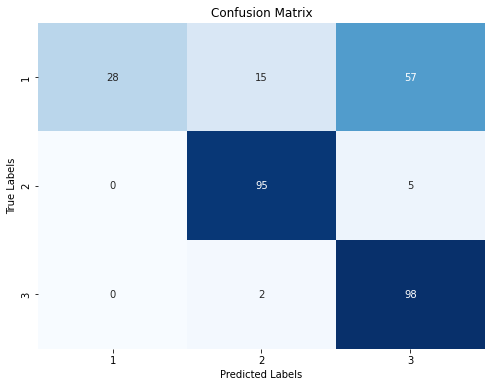

In [193]:
conf_matrix=confusion_matrix(sampled_df['RLabel'], sampled_df['y_pred'])
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set the tick labels to match your class labels (1, 2, 3)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=[1, 2, 3])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=[1, 2, 3])

plt.show()

In [195]:
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV3/V3_Labeled_300_sampled.json', orient='records')
remaining_df.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV3/V3_Labeled_1104_remaining.json', orient='records')

# MERGE with previous labeled set

In [196]:
iter2=pd.read_json('/home/ravi/raviProject/DATA/Annotate/iterData/iter2_Labeled_600_sampled.json', orient='records')

In [197]:
iter2.head(1)

,msgDate,msg,replyDate,text,telegramChannel,FinalLabel
0,1641745947,This is so wrong.\n,1641755795,Sounds like their trying to kill off the other...,AnalyzingAmerica.json,0


In [198]:
iter2['FinalLabel'].value_counts()

0    200
1    200
2    200
Name: FinalLabel, dtype: int64

In [206]:
v3df = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV3/V3_Labeled_300_sampled.json', orient='records')
v3df['FinalLabel']=v3df['RLabel']

In [207]:
v3df.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred,RLabel,FinalLabel
0,1631806658,,1631806805,Fuck admin top down ! Let professors teach . B...,TheTrumpRepublicans.json,3,3,3


In [208]:
# Replace values in column 'FinalLabel'
replacement_dict = {1 : 0, 2 : 1, 3 : 2}
v3df['FinalLabel'] = v3df['FinalLabel'].replace(replacement_dict)

In [209]:
v3df['FinalLabel'].value_counts()

2    100
0    100
1    100
Name: FinalLabel, dtype: int64

In [210]:
selected_cols =['msgDate', 'msg', 'replyDate', 'text', 'telegramChannel', 'FinalLabel']
merged_df = pd.concat([iter2[selected_cols], v3df[selected_cols]], ignore_index=True)

In [211]:
merged_df.head(1)

,msgDate,msg,replyDate,text,telegramChannel,FinalLabel
0,1641745947,This is so wrong.\n,1641755795,Sounds like their trying to kill off the other...,AnalyzingAmerica.json,0


In [212]:
merged_df['FinalLabel'].value_counts()

0    300
1    300
2    300
Name: FinalLabel, dtype: int64

In [213]:
merged_df.to_json('/home/ravi/raviProject/DATA/Annotate/iterData/iter3_Labeled_900_sampled.json', orient='records')